In [ ]:
#Import the required librarys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [ ]:
#load data
from google.colab import files
uploaded = files.upload()

In [ ]:
df= pd.read_csv('car_model.csv')
df.head(2)

,Make,Model,Variant,Price,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Power,Seating_Capacity
0,Tata,Nano Genx,Xt,292667,BS IV,Petrol,24.0,1652.0,175.0,5.0,23.00,38.0,4.0
1,Tata,Nano Genx,Xe,236447,BS IV,Petrol,24.0,1652.0,175.0,5.0,23.00,38.0,4.0


In [ ]:
df.shape

(1275, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 1270
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                733 non-null    object 
 1   Model               733 non-null    object 
 2   Variant             733 non-null    object 
 3   Price               733 non-null    int64  
 4   Emission_Norm       733 non-null    object 
 5   Fuel_Type           733 non-null    object 
 6   Fuel_Tank_Capacity  733 non-null    float64
 7   Height              733 non-null    float64
 8   Width               733 non-null    float64
 9   Doors               733 non-null    float64
 10  City_Mileage        733 non-null    int64  
 11  Power               733 non-null    float64
 12  Seating_Capacity    733 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 80.2+ KB


In [ ]:
df['Power']=df['Power'].astype(int)

In [ ]:
df['City_Mileage']=df['City_Mileage'].str.replace('.00','').astype(int)

In [ ]:
mdf.describe()

,Price,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Power,Seating_Capacity
count,7.240000e+02,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.355128e+06,35.783011,1021.096685,1090.843923,4.570442,13.998619,76.356906,5.324586
std,7.970487e+06,22.098789,714.108318,792.816817,0.707016,7.004148,65.997014,1.109946
min,2.364470e+05,4.000000,12.000000,16.000000,2.000000,1.000000,1.000000,2.000000
25%,6.764750e+05,8.000000,157.000000,178.750000,4.000000,11.000000,15.000000,5.000000
50%,9.250000e+05,39.000000,1466.000000,1682.000000,5.000000,14.500000,70.000000,5.000000
75%,1.866104e+06,46.000000,1595.000000,1737.500000,5.000000,18.000000,89.000000,5.000000
max,9.500000e+07,93.500000,1995.000000,2226.000000,5.000000,36.000000,468.000000,9.000000


In [ ]:
#outlires remove it  if it is less in count
#mdf=df[df['Power']>5.0].reset_index(drop=True)
mdf=df[df['Power']<500].reset_index(drop=True)
#mdf=df[df['City_Mileage']>5.0].reset_index(drop=True)
#mdf=df[df['Fuel_Tank_Capacity']>8.0].reset_index(drop=True)
#mdf=df[df['Height']>80.0].reset_index(drop=True)
#mdf=df[df['Width']>80.0].reset_index(drop=True)

In [ ]:
mdf.shape

(724, 13)

In [ ]:
mdf.to_csv('Cleand car model.csv')

In [ ]:
mdf.head(2)

,Make,Model,Variant,Price,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Power,Seating_Capacity
0,Tata,Nano Genx,Xt,292667,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,38.0,4.0
1,Tata,Nano Genx,Xe,236447,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,38.0,4.0


In [ ]:
df=df.dropna()

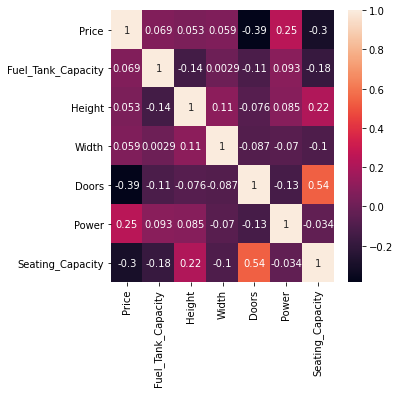

In [ ]:
plt.figure(figsize = (5, 5))

sns.heatmap(df.corr(), annot=True, annot_kws={'size': 10})

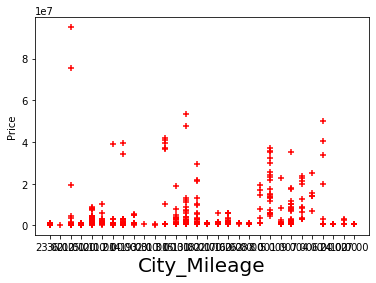

In [ ]:

plt.xlabel('City_Mileage',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.City_Mileage,df.Price,color='red',marker='+')

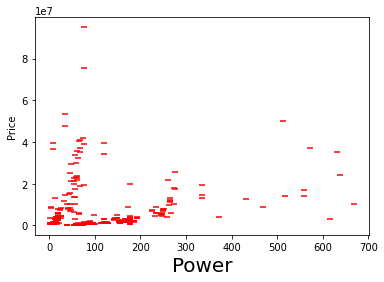

In [ ]:

plt.xlabel('Power',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Power,df.Price,color='red',marker='_')

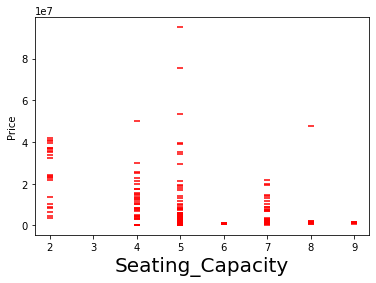

In [ ]:

plt.xlabel('Seating_Capacity',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Seating_Capacity,df.Price,color='red',marker='_')


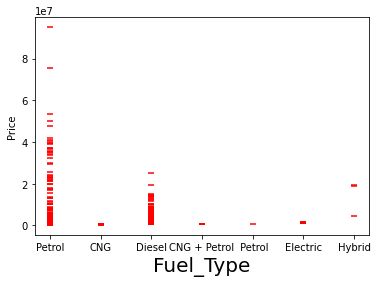

In [ ]:

plt.xlabel('Fuel_Type',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Fuel_Type,df.Price,color='red',marker='_')

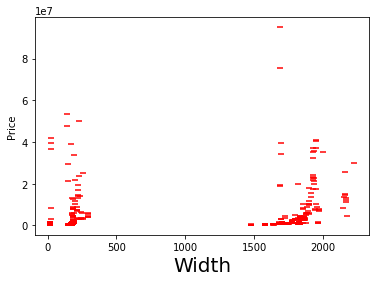

In [ ]:

plt.xlabel('Width',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Width,df.Price,color='red',marker='_')

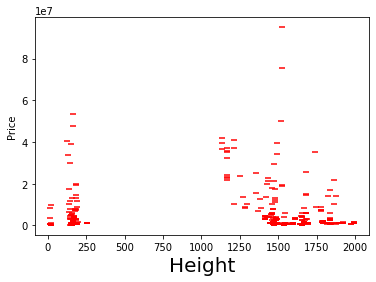

In [ ]:

plt.xlabel('Height',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Height,df.Price,color='red',marker='_')

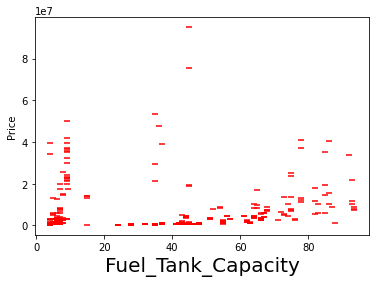

In [ ]:

plt.xlabel('Fuel_Tank_Capacity',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Fuel_Tank_Capacity,df.Price,color='red',marker='_')

In [ ]:
print(df.columns.values.tolist())

['Price', 'Fuel_Tank_Capacity', 'Height', 'Width', 'Doors', 'City_Mileage', 'Power', 'Seating_Capacity']


In [ ]:
df.head(2)

,Make,Model,Variant,Price,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Power,Seating_Capacity
0,Tata,Nano Genx,Xt,292667,BS IV,Petrol,24.0,1652.0,175.0,5.0,23.00,38.0,4.0
1,Tata,Nano Genx,Xe,236447,BS IV,Petrol,24.0,1652.0,175.0,5.0,23.00,38.0,4.0


# **Model Simple LinearRegression **





In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['City_Mileage','Height','Fuel_Tank_Capacity','Width','Seating_Capacity','Power']],df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**price= m1* City_Mileage+m2* Height+.......+m6*Power +b **


1.  ***b is Intercept***
2. ***m is Coefficient***   



In [ ]:
#this are the value of m  coefficients
reg.coef_

array([-1.88662989e+05,  1.18835512e+03, -7.79603574e+02,  3.59015818e+02,
       -2.18863132e+06,  2.01974572e+04])

In [ ]:
#this is intercept 
reg.intercept_

14570200.608719071

In [ ]:
#'City_Mileage','Height','Fuel_Tank_Capacity','Width','Seating_Capacity','Power'
reg.predict([[20,160,30,140,4,55]])

array([3370286.62036439])

In [ ]:
reg.predict([[8,140,30,140,2,55]])

array([9987738.02547399])

In [ ]:
pickle.dump(reg,open('CarPricePrediction.pkl','wb'))

**Model**

In [ ]:
x=mdf.drop(columns='Price')
y=mdf['Price']

In [ ]:
mdf.drop('Model',axis=1,inplace=True)
mdf.drop('Variant',axis=1,inplace=True)
mdf.drop('Emission_Norm',axis=1,inplace=True)
mdf.drop('Height',axis=1,inplace=True)
mdf.drop('Width',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train ,y_test=train_test_split(x,y, test_size=0.2)

In [ ]:
x

,Make,Fuel_Type,Fuel_Tank_Capacity,Doors,City_Mileage,Power,Seating_Capacity
0,Tata,Petrol,24.0,5.0,23,38.0,4.0
1,Tata,Petrol,24.0,5.0,23,38.0,4.0
2,Tata,CNG,15.0,4.0,36,38.0,4.0
3,Tata,Petrol,24.0,5.0,23,38.0,4.0
4,Tata,Petrol,24.0,5.0,23,38.0,4.0
...,...,...,...,...,...,...,...
719,Honda,Petrol,4.0,4.0,22,1.0,5.0
720,Honda,Petrol,4.0,4.0,22,1.0,5.0
721,Honda,Diesel,4.0,4.0,18,119.0,5.0
722,Honda,Diesel,4.0,4.0,14,119.0,5.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
ohe =OneHotEncoder()
ohe.fit(x[['Make','Fuel_Type','City_Mileage','Fuel_Tank_Capacity','Seating_Capacity','Power','Doors']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
column_trans =make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make','Fuel_Type','City_Mileage','Fuel_Tank_Capacity','Seating_Capacity','Power','Doors']),
                                         remainder='passthrough')     

In [ ]:
lr=LinearRegression()

In [ ]:
pipe=make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Datsun', 'Dc',
       'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini...
       258. , 261. , 262. , 265. , 268. , 274. , 275. , 335. , 372. ,
       431. , 468. ]),
                                                                            array([2., 3., 4., 5.])],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                               

In [ ]:
y_pred=pipe.predict(x_test)

In [ ]:
#this is not geting + output so this fails 
r2_score(y_test,y_pred)

-0.22839346566109953

In [ ]:
#it gives 0.6 r2 scrore  i want max score = 0.6 
for i in range(10):
  x_train, x_test ,y_train ,y_test=train_test_split(x,y, test_size=0.2)
  lr=LinearRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  print(r2_score(y_test,y_pred),i)

0.37562704204581066 0
-0.3219701803977284 1
0.08218131299399956 2
0.6150371293408451 3
0.21981042230290904 4
0.3243474225688615 5
0.4786418500945152 6
-0.3697549839365415 7
0.4845678844371277 8
-0.49846448606386806 9


In [ ]:
#i want to store the score for heigst  score 
#,random_state=i
scores=[]
for i in range(100):
  x_train, x_test ,y_train ,y_test=train_test_split(x,y, test_size=0.2)
  lr=LinearRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))

In [ ]:
#the max score in stores 
np.argmax(scores)

79

In [ ]:
scores[79]

0.6195946175865271

In [ ]:
scores[np.argmax(scores)]

0.6195946175865271

 **Train the model using random state**

In [ ]:
#random_state=np.argmax(scores)  it  gives low score 
x_train, x_test ,y_train ,y_test=train_test_split(x,y, test_size=0.2)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.45239572854566523

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModelforCarPrice.pkl','wb'))

In [ ]:
x

,Make,Fuel_Type,Fuel_Tank_Capacity,Doors,City_Mileage,Power,Seating_Capacity
0,Tata,Petrol,24.0,5.0,23,38.0,4.0
1,Tata,Petrol,24.0,5.0,23,38.0,4.0
2,Tata,CNG,15.0,4.0,36,38.0,4.0
3,Tata,Petrol,24.0,5.0,23,38.0,4.0
4,Tata,Petrol,24.0,5.0,23,38.0,4.0
...,...,...,...,...,...,...,...
719,Honda,Petrol,4.0,4.0,22,1.0,5.0
720,Honda,Petrol,4.0,4.0,22,1.0,5.0
721,Honda,Diesel,4.0,4.0,18,119.0,5.0
722,Honda,Diesel,4.0,4.0,14,119.0,5.0


In [ ]:
#'Make','Fuel_Type','City_Mileage','Fuel_Tank_Capacity','Seating_Capacity','Power','Doors'
pipe.predict(pd.DataFrame((['Tata','Petrol',24,5,23,38,4],columns=['Make','Fuel_Type','Fuel_Tank_Capacity','Doors','City_Mileage','Power','Seating_Capacity'])))

#Logistic on categorical data 

In [2]:
#logistic 
#Import the required librarys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#load data
from google.colab import files
uploaded = files.upload()

Saving 4_Categorical_data.csv to 4_Categorical_data.csv


In [5]:
df= pd.read_csv('4_Categorical_data.csv')
df.head(2)

,Unnamed: 0,Electronic_Brake_Assist1,Anti-lock_Braking_System1,Power_Steering_Electric_Power,Power_Steering_Electro_Hydraulic,Power_Steering_Hydraulic_Power,Central_Locking1,Cup_Holders_Centre,Cup_Holders_Front,Cup_Holders_Front&Rear,Drive_Mode_Sport,Drive_Mode_Normal,Voice_Recognition1,Front & rear sensors with 36 degree view,Front and rear sensors with camera,"Front sensors, Rear sensors",Rear sensors,Rear sensors with camera,"Rear sensors, Front sensors","Rear sensors, Rear sensors with camera",Voice_Recognition1.1,Navigation_System1,Rain_Sensing_Wipers1,All Windows,Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,Power_Windows_All_Windows.1,Power_Windows_Only Front Windows.1,Rear_\Drum,Rear_Solid_Disc,Rear_Ventilated_Disc,Front_Solid_Disc,Front_Ventilated_Disc,CNG,Diesel,Electric,Petrol,BS 6,BS IV,...,HondaAccord Hybrid,HondaBrv,HondaCity,HondaJazz,HyundaiVerna,JaguarXj,MahindraKuv1 Nxt,MahindraTuv3,Maruti SuzukiDzire,Maruti SuzukiDzire Tour,NissanMicra,NissanSunny,NissanTerrano,PorschePanamera,RenaultDuster,RenaultLodgy,SkodaKodiaq,SkodaMonte Carlo,SkodaRapid,SkodaSuperb,SkodaSuperb Sportline,TataBolt,TataSafari Storme,TataTiago,TataTigor,ToyotaCorolla Altis,ToyotaEtios Cross,ToyotaFortuner,VolkswagenPolo,VolkswagenVento,Price,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Seating_Capacity,Basic_Warranty,Minimum_Turning_Radius
0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,520000,4.0,35.0,1535.0,1647.0,5.0,23,5.0,2,4.9
1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,570000,4.0,35.0,1535.0,1647.0,5.0,23,5.0,2,4.9


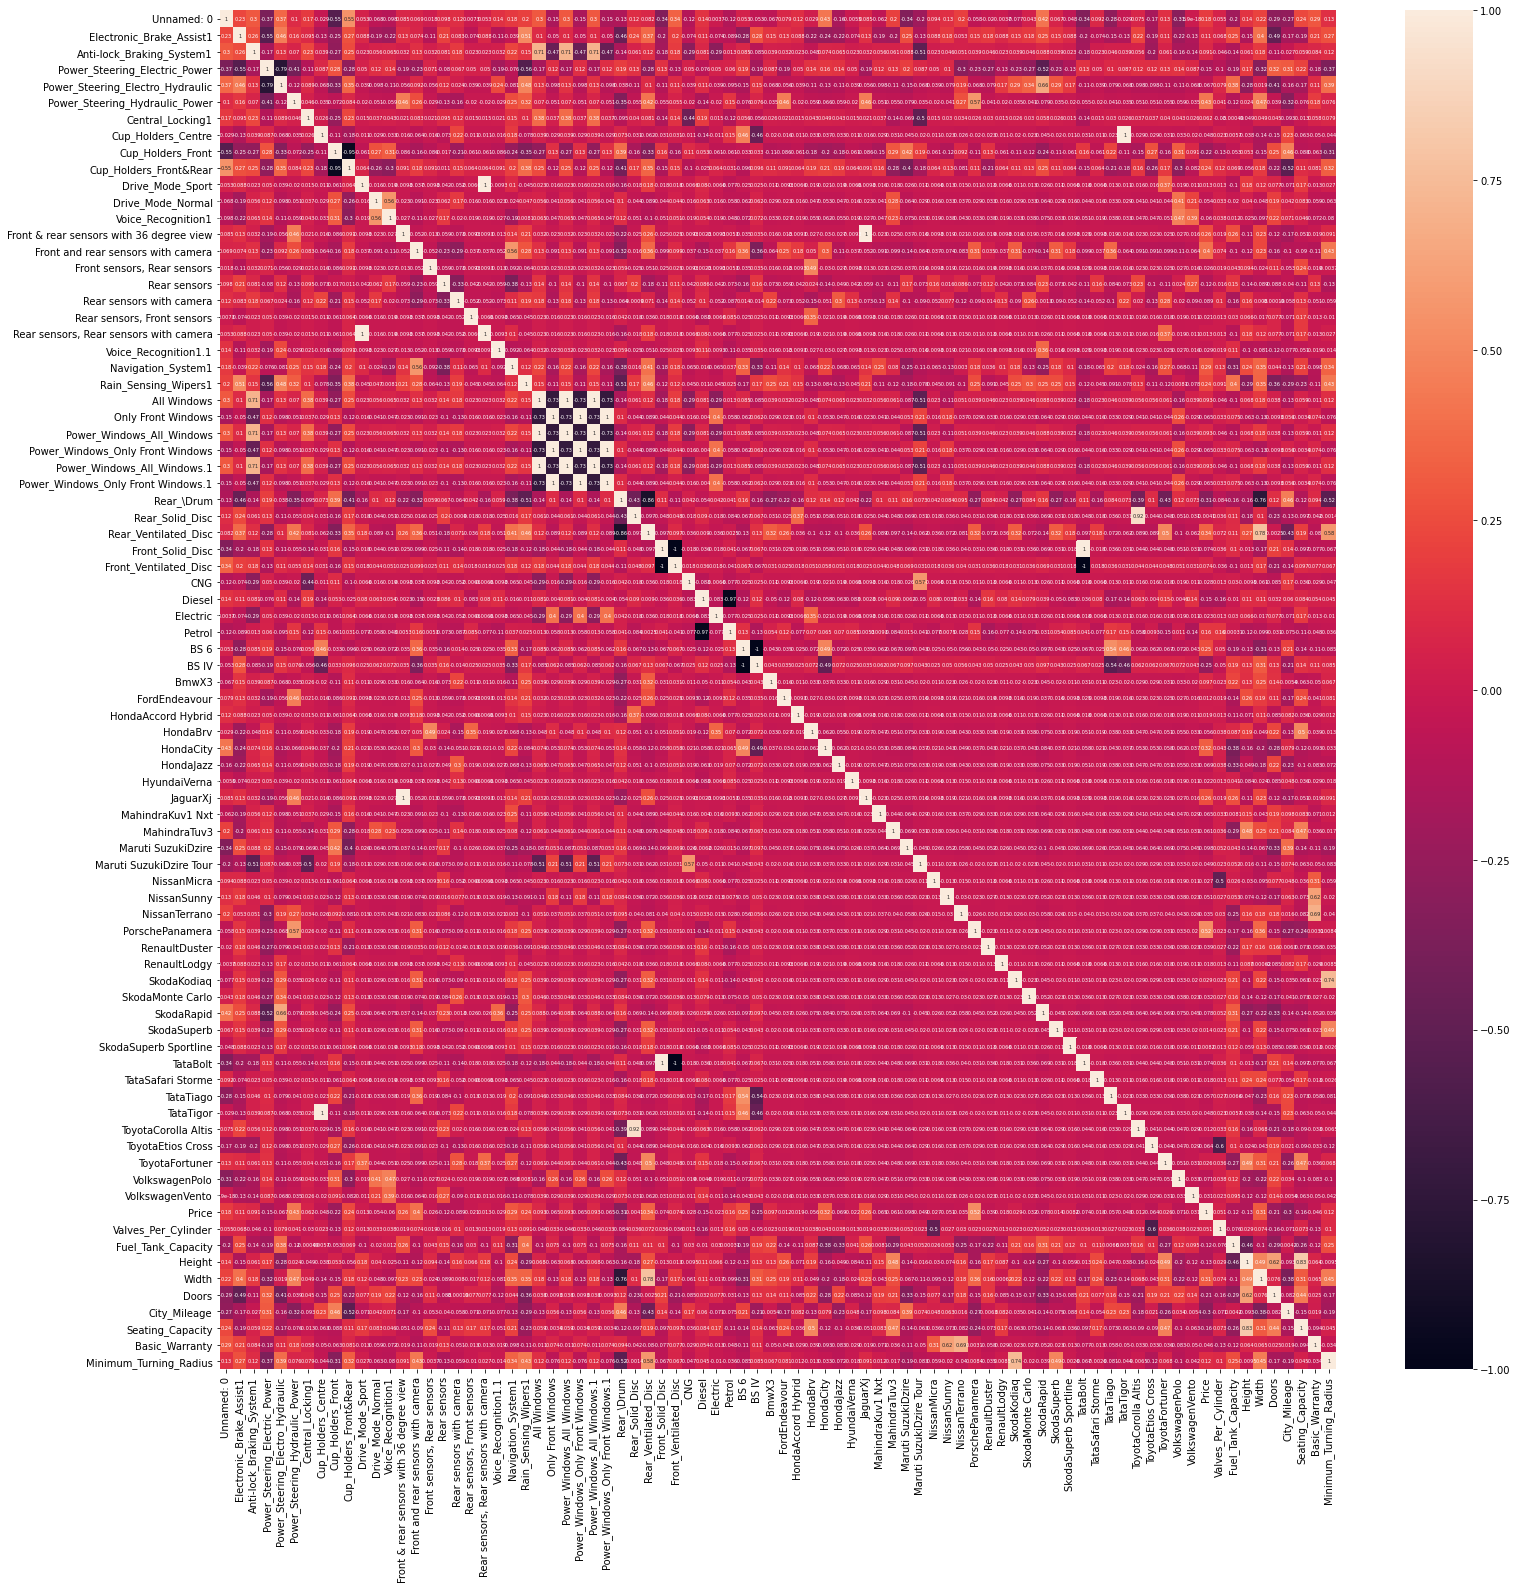

In [7]:
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 5})

In [10]:
df.shape

(153, 82)

In [46]:
# rows:column 
x=df.drop(columns='Price')
y=df['Price']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print(logmodel.coef_)

[[-1.35306699e-09 -6.65696575e-12  1.85635992e-11 ...  4.91832103e-10
   7.86330775e-11 -6.44805554e-12]
 [-1.08252190e-09 -6.76007615e-12 -1.79079360e-11 ...  2.70294977e-10
   7.73349601e-11 -7.47964459e-12]
 [-9.89923836e-10 -7.03997687e-12 -1.85241155e-11 ...  2.23091435e-10
   7.38395377e-11 -1.02553471e-11]
 ...
 [-6.35749047e-09 -2.36203555e-11 -6.22753204e-11 ... -1.23129381e-09
  -3.80711925e-10 -2.33449141e-10]
 [-6.53082298e-09 -2.48600000e-11 -6.44083902e-11 ... -1.25571236e-09
  -3.90794876e-10 -2.39982939e-10]
 [-5.96677372e-09 -7.39681293e-11 -8.96719123e-11 ... -1.29432573e-09
  -4.73877513e-10 -3.86600619e-10]]


In [51]:
print(logmodel.intercept_)

[ 1.70051984e-11  1.67644532e-11  1.61164473e-11  1.56780678e-11
  1.53620514e-11  1.51450414e-11  1.49181316e-11  1.49165688e-11
  3.73642020e-11  1.45125325e-11  1.40823982e-11  1.35988160e-11
  1.35089492e-11  1.33159447e-11  1.31762484e-11  1.30085061e-11
  1.29656699e-11  1.29268876e-11  1.24996168e-11  1.24934415e-11
  1.23130943e-11  1.21648611e-11  1.18533002e-11  1.15485409e-11
  1.14903844e-11  1.12355122e-11  1.11598861e-11  1.10051376e-11
  1.09312638e-11  1.07305925e-11  1.04805439e-11  1.04185547e-11
  1.02248850e-11  9.98516623e-12  9.87983209e-12  9.81859187e-12
  9.73863854e-12  9.72684130e-12  9.55394357e-12  9.54235931e-12
  9.53953111e-12  9.42405403e-12  8.73965694e-12  8.67547457e-12
  8.47671778e-12  8.05522060e-12  7.37795174e-12  7.33858331e-12
  7.04011837e-12  6.96405970e-12  6.88701065e-12  6.76910026e-12
  6.50796635e-12  6.50198477e-12  5.99633567e-12  5.74451961e-12
  5.69182951e-12  5.60762622e-12  5.55118386e-12  5.53208541e-12
  5.51110795e-12  2.49350

In [70]:
x_test

,Unnamed: 0,Electronic_Brake_Assist1,Anti-lock_Braking_System1,Power_Steering_Electric_Power,Power_Steering_Electro_Hydraulic,Power_Steering_Hydraulic_Power,Central_Locking1,Cup_Holders_Centre,Cup_Holders_Front,Cup_Holders_Front&Rear,Drive_Mode_Sport,Drive_Mode_Normal,Voice_Recognition1,Front & rear sensors with 36 degree view,Front and rear sensors with camera,"Front sensors, Rear sensors",Rear sensors,Rear sensors with camera,"Rear sensors, Front sensors","Rear sensors, Rear sensors with camera",Voice_Recognition1.1,Navigation_System1,Rain_Sensing_Wipers1,All Windows,Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,Power_Windows_All_Windows.1,Power_Windows_Only Front Windows.1,Rear_\Drum,Rear_Solid_Disc,Rear_Ventilated_Disc,Front_Solid_Disc,Front_Ventilated_Disc,CNG,Diesel,Electric,Petrol,BS 6,BS IV,...,FordEndeavour,HondaAccord Hybrid,HondaBrv,HondaCity,HondaJazz,HyundaiVerna,JaguarXj,MahindraKuv1 Nxt,MahindraTuv3,Maruti SuzukiDzire,Maruti SuzukiDzire Tour,NissanMicra,NissanSunny,NissanTerrano,PorschePanamera,RenaultDuster,RenaultLodgy,SkodaKodiaq,SkodaMonte Carlo,SkodaRapid,SkodaSuperb,SkodaSuperb Sportline,TataBolt,TataSafari Storme,TataTiago,TataTigor,ToyotaCorolla Altis,ToyotaEtios Cross,ToyotaFortuner,VolkswagenPolo,VolkswagenVento,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Seating_Capacity,Basic_Warranty,Minimum_Turning_Radius
124,124,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,1671.0,1822.0,5.0,16,5.0,24,5.20
15,15,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.0,45.0,1469.0,1682.0,5.0,14,5.0,2,4.97
11,11,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,42.0,1555.0,1695.0,4.0,14,5.0,2,4.80
72,72,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,1695.0,1822.0,5.0,16,5.0,2,5.20
144,144,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,1495.0,1695.0,4.0,14,5.0,2,5.30
34,34,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,37.0,1515.0,1735.0,4.0,28,5.0,2,4.80
45,45,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,1544.0,1694.0,5.0,11,5.0,2,5.10
76,76,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,45.0,1469.0,1682.0,5.0,19,5.0,2,4.97
17,17,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.0,45.0,1469.0,1682.0,5.0,19,5.0,2,4.97
104,104,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.0,8.0,1835.0,1855.0,5.0,7,7.0,3,5.60


In [71]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
logmodel.predict(x_test)

array([ 1629000,   776500,   529035,  1209990,  2992800,   952622,
         745000,  1449500,   776500,  3205000,  3099599,  1065900,
        2977000,  3299599,   582613,   529035,   776500,  1209990,
        1167900,  3099599, 17940227,  1167900,   868613,  1269599,
        1209990,  2196000,  1111000,  1629000,  1065900,   776500,
         529035])

In [78]:
logmodel.score(x_train,y_train)

0.5655737704918032

In [74]:
logmodel.predict_proba(x_test)

array([[1.60733621e-022, 9.67375888e-021, 4.19774552e-022, ...,
        5.76255921e-101, 2.77580232e-006, 2.05824634e-006],
       [2.48919171e-008, 2.15617536e-005, 2.68180076e-008, ...,
        7.71265866e-055, 7.08762858e-030, 2.41692496e-030],
       [3.65242316e-002, 1.51046619e-001, 3.84604462e-002, ...,
        1.11840116e-096, 1.52583426e-036, 4.86116132e-037],
       ...,
       [1.02694469e-040, 8.74500028e-037, 3.29349126e-040, ...,
        1.33776491e-070, 1.36912906e-001, 1.40965936e-001],
       [1.22548150e-008, 1.15900439e-005, 1.37496173e-008, ...,
        1.80439403e-054, 4.48868041e-028, 1.59531042e-028],
       [3.68127157e-002, 1.43887015e-001, 3.90839641e-002, ...,
        1.29276466e-096, 3.68226156e-036, 1.18280927e-036]])

In [52]:
y_pred =logmodel.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
from sklearn.metrics import accuracy_score
print('accuracy scroe',(y_test,y_pred))

accuracy scroe (145    34167064
81      1167900
22       582613
126     1235700
44       789000
97      2599599
88      1269599
33       906122
71      1209990
27       720112
108    17940227
102     3191000
43       909000
47       896500
78       944175
23       673112
32       868613
110      646336
59     22613000
91      2214000
45       865000
95      1806000
104     3019000
107     2818000
20       976000
72      1249990
136     1249599
40       668500
68       660000
75       964199
37       650000
Name: Price, dtype: int64, array([39382083, 39382083, 39382083, 39382083, 39382083, 39382083,
       39382083, 39382083, 39382083, 39382083, 39382083, 39382083,
       39382083, 39382083, 39382083, 39382083, 39382083, 39382083,
       39382083, 39382083, 39382083, 39382083, 39382083, 39382083,
       39382083, 39382083, 39382083, 39382083, 39382083, 39382083,
       39382083]))


#linear regression

In [61]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.intercept_

-8.917413651943207e-08

In [65]:
model.coef_

array([ 9.35447932e-11,  5.83796456e-10, -8.10843873e-10,  1.72767631e-09,
       -1.97493744e-09,  4.65268744e-10, -4.50985726e-10,  3.09904009e-09,
       -7.65512599e-10, -2.33352749e-09, -2.09199399e-10,  2.57044820e-10,
        1.35669230e-10, -1.30876611e-08, -4.89592216e-10,  4.35862484e-10,
       -7.64678730e-10, -1.12408669e-09,  1.74721676e-09, -2.09199399e-10,
        2.69595535e-09,  1.23283107e-09,  2.62814082e-10,  3.53828729e-10,
       -6.12647119e-10,  3.53828729e-10, -6.12647119e-10,  3.53828729e-10,
       -6.12647119e-10,  9.36718333e-09, -5.47656815e-09, -3.89061518e-09,
       -3.47182910e-10,  3.47182910e-10, -3.11824443e-10,  1.40664711e-11,
       -8.27180613e-23,  2.97757972e-10, -1.45409151e-10,  1.45409151e-10,
       -3.97800958e-09,  2.22952697e-08, -7.69212394e-09,  3.93608066e-09,
        2.99200976e-10,  1.87717445e-09, -7.30519774e-09, -1.30876611e-08,
        2.50049217e-09,  9.01229788e-09,  2.36122903e-09,  1.18172584e-08,
       -9.26874872e-09,  

In [66]:
lr=LinearRegression()

In [79]:
model.score(x_train,y_train)

-0.20264133829406528